In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)


In [7]:
train = pd.read_csv("../../data/interim/train.csv")

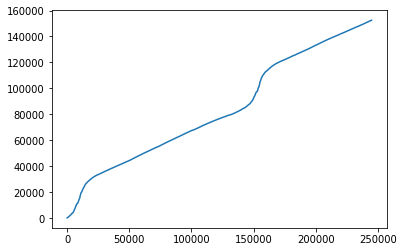

In [8]:
plt.plot(train["time"])

I want to add the time feature engineering to the dev/test dataset in the previous notebook before saving it to the text files.